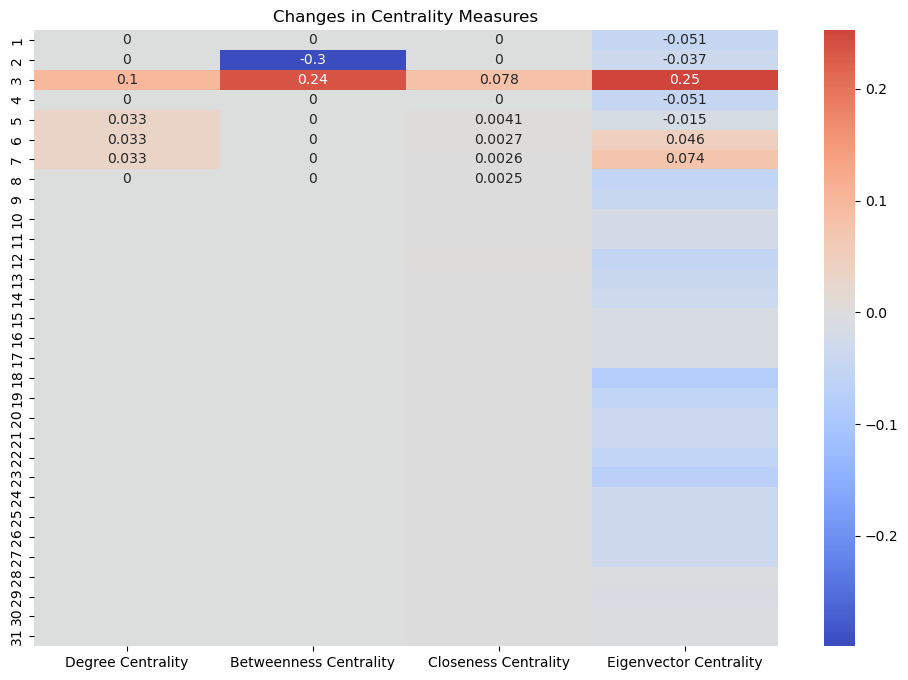

Detected Anomalies in Centrality Changes:
   Degree Centrality  Betweenness Centrality  Closeness Centrality  \
2           0.000000               -0.298851              0.000000   
3           0.100000                0.236782              0.078458   
5           0.033333                0.000000              0.004104   

   Eigenvector Centrality  anomaly  
2               -0.036736       -1  
3                0.252463       -1  
5               -0.015189       -1  
Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


C:\Users\Service Casket\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
import seaborn as sns
from pyvis.network import Network

# Load the nodes and edges data
def load_graph(nodes_file, edges_file):
    nodes_df = pd.read_csv(nodes_file)
    edges_df = pd.read_csv(edges_file)
    G = nx.Graph()
    
    for index, row in nodes_df.iterrows():
        G.add_node(row['Id'], label=row['Label'], shape=row.get('Shape', 'ellipse'))
    
    for index, row in edges_df.iterrows():
        G.add_edge(row['Source'], row['Target'])
    
    return G, nodes_df, edges_df

# Load two snapshots
G1, nodes_df1, edges_df1 = load_graph('ICS_OT Nodes.csv', 'ICS_OT Edges.csv')
G2, nodes_df2, edges_df2 = load_graph('ICS_OT NodesInfected.csv', 'ICS_OT EdgesInfected.csv')

# Calculate centrality measures for both snapshots
def calculate_centrality(G):
    centrality_measures = {
        'Degree Centrality': nx.degree_centrality(G),
        'Betweenness Centrality': nx.betweenness_centrality(G),
        'Closeness Centrality': nx.closeness_centrality(G),
        'Eigenvector Centrality': nx.eigenvector_centrality(G)
    }
    return pd.DataFrame(centrality_measures).sort_index()

centrality_df1 = calculate_centrality(G1)
centrality_df2 = calculate_centrality(G2)

# Calculate changes in centrality measures
centrality_changes = centrality_df2 - centrality_df1

# Visualize changes using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(centrality_changes, annot=True, cmap='coolwarm', center=0)
plt.title('Changes in Centrality Measures')
plt.show()

# Detect anomalies using Isolation Forest
def detect_anomalies(df):
    iso_forest = IsolationForest(contamination=0.1)
    df['anomaly'] = iso_forest.fit_predict(df)
    return df

anomalies = detect_anomalies(centrality_changes)

# Print anomalies
print("Detected Anomalies in Centrality Changes:")
print(anomalies[anomalies['anomaly'] == -1])

# Visualize the network using PyVis
def visualize_network(G, title):
    net = Network(notebook=True)
    net.from_nx(G)
    net.show(f'{title}.html')

visualize_network(G1, "Network Snapshot 1")
visualize_network(G2, "Network Snapshot 2")
